## 1. Exploración y limpieza del dataset

### 1.1. Carga del Dataset y configuracion del entorno

En este apartado se cargan las librerias correspondientes para poder graficar y generar el modelo de IA, como se logra observar, se usara pandas, numpy, matplotlib, seaborn, sklearn.

In [32]:
# Install dependencies as needed:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


Aqui se carga el dataset, el cual es necesario para poder generar el entrenamiento y testeo del modelo, ademas en esta seccion la variable data_copy, guarda una copia del conjunto del dataset, para poder validarla despues con respecto a data( el cual sufrio normalizacion), donde data_copy no esta normalizado.
El print de data.head(), imprime el valor de los primeros 5 datos del dataset de data.

In [ ]:
# Load the data
data = pd.read_csv('apples.csv')

# Create a copy of the data for manipulation
data_copy = data.copy()

# Print the first few rows of the data
print(data.head())

   A_id      Size    Weight  Sweetness  Crunchiness  Juiciness  Ripeness  \
0   0.0 -3.970049 -2.512336   5.346330    -1.012009   1.844900  0.329840   
1   1.0 -1.195217 -2.839257   3.664059     1.588232   0.853286  0.867530   
2   2.0 -0.292024 -1.351282  -1.738429    -0.342616   2.838636 -0.038033   
3   3.0 -0.657196 -2.271627   1.324874    -0.097875   3.637970 -3.413761   
4   4.0  1.364217 -1.296612  -0.384658    -0.553006   3.030874 -1.303849   

        Acidity Quality  
0  -0.491590483    good  
1  -0.722809367    good  
2   2.621636473     bad  
3   0.790723217    good  
4   0.501984036    good  


### 1.2. Analisis del dataset


In [34]:
# Análisis exploratorio de datos (EDA)

data.info() # brinda informacion de los datos como el tipo de dato, cantidad de datos no nulos, etc

data.describe() # brinda estadisticas descriptivas de los datos


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4001 entries, 0 to 4000
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   A_id         4000 non-null   float64
 1   Size         4000 non-null   float64
 2   Weight       4000 non-null   float64
 3   Sweetness    4000 non-null   float64
 4   Crunchiness  4000 non-null   float64
 5   Juiciness    4000 non-null   float64
 6   Ripeness     4000 non-null   float64
 7   Acidity      4001 non-null   object 
 8   Quality      4000 non-null   object 
dtypes: float64(7), object(2)
memory usage: 281.4+ KB


A_id         Size       Weight    Sweetness  Crunchiness  \
count  4000.000000  4000.000000  4000.000000  4000.000000  4000.000000   
mean   1999.500000    -0.503015    -0.989547    -0.470479     0.985478   
std    1154.844867     1.928059     1.602507     1.943441     1.402757   
min       0.000000    -7.151703    -7.149848    -6.894485    -6.055058   
25%     999.750000    -1.816765    -2.011770    -1.738425     0.062764   
50%    1999.500000    -0.513703    -0.984736    -0.504758     0.998249   
75%    2999.250000     0.805526     0.030976     0.801922     1.894234   
max    3999.000000     6.406367     5.790714     6.374916     7.619852   

         Juiciness     Ripeness  
count  4000.000000  4000.000000  
mean      0.512118     0.498277  
std       1.930286     1.874427  
min      -5.961897    -5.864599  
25%      -0.801286    -0.771677  
50%       0.534219     0.503445  
75%       1.835976     1.766212  
max       7.364403     7.237837

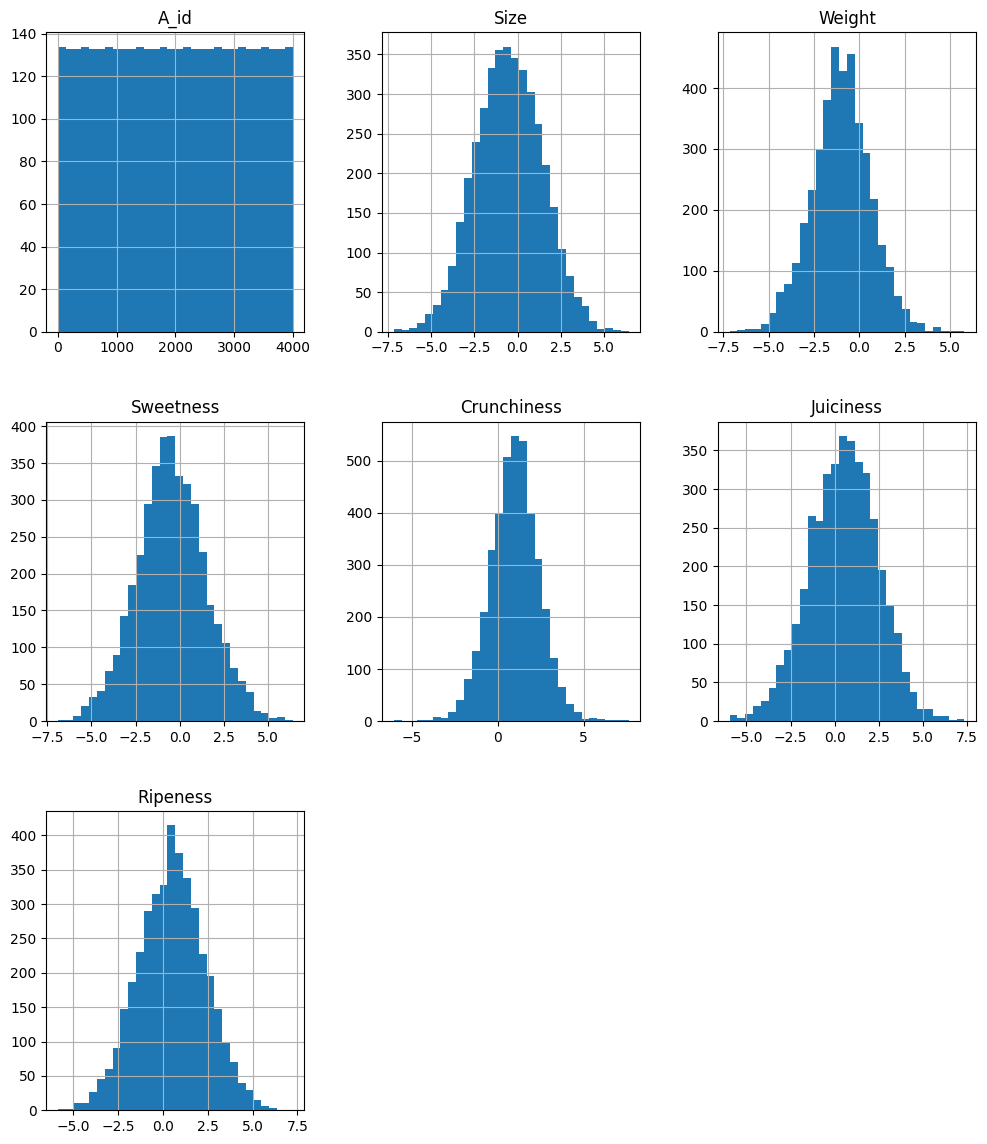

In [35]:

data.hist(figsize=(12, 14), bins=30) # histograma de los datos para ver la distribucion de los datos en cada columna de la data 
plt.show() # muestra el histograma de los datos 

## 1.3. Insertar analisis de distribuciones

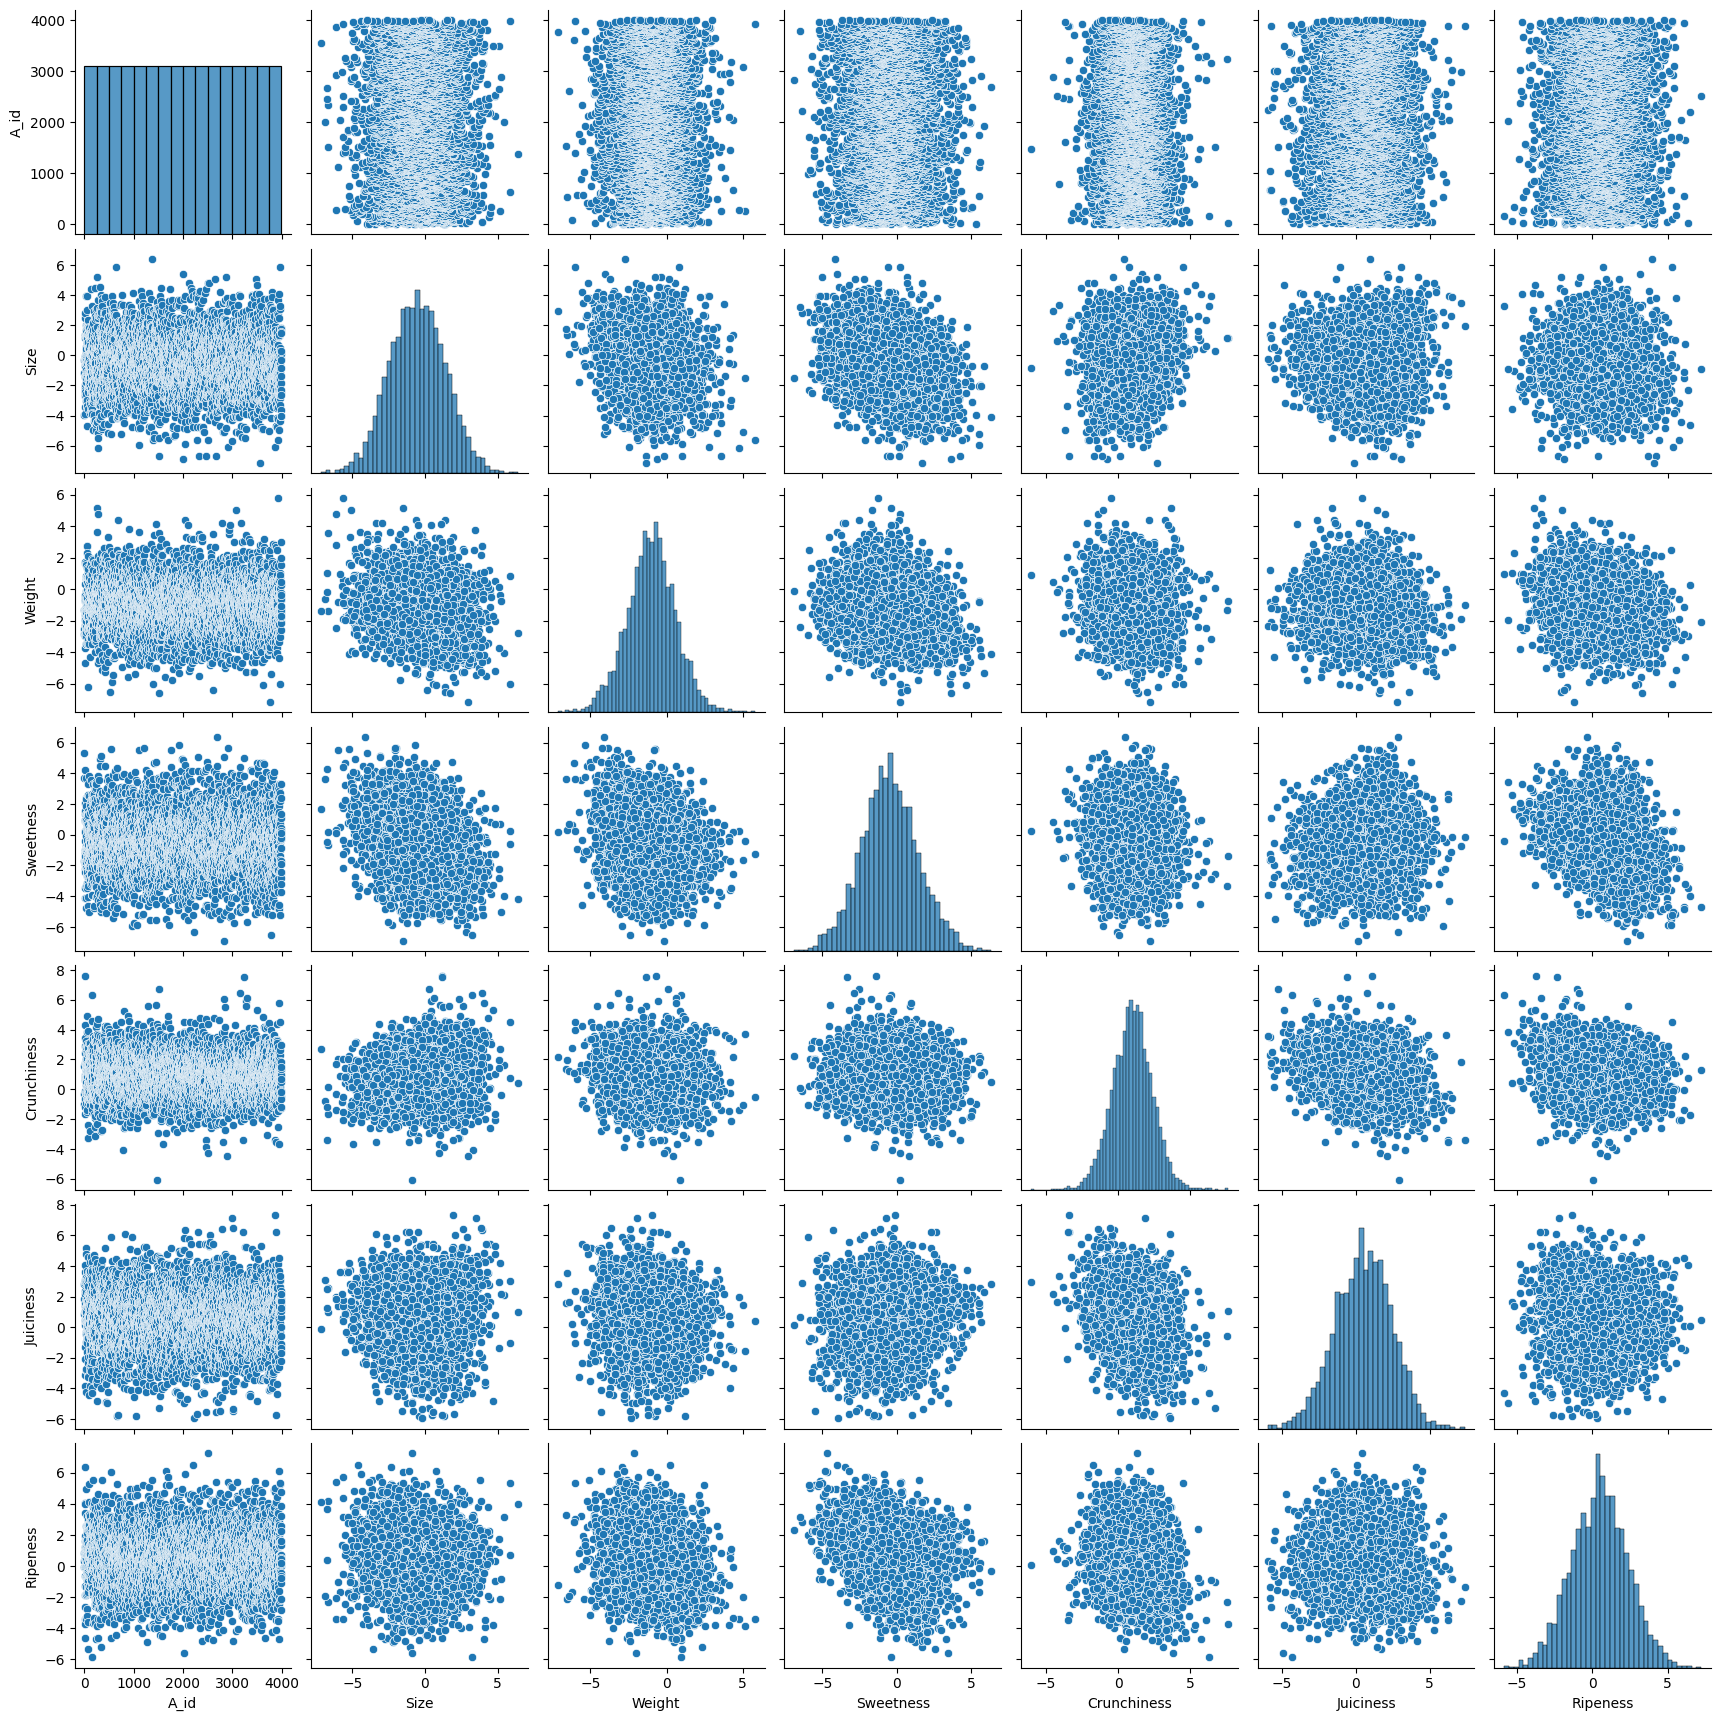

In [36]:
sns.pairplot(data) # grafico de pares para ver la relacion entre las variables de la data

Como se logra observar, debido a que dos datos son tomados como tipo object, estos no se ven representados en las graficas anteriores. Por ende es necesario trabajarlos para poder representarlos y utilizarlos.

In [ ]:
data["Acidity"] = pd.to_numeric(data["Acidity"], errors='coerce') # convierte la columna Acidity a tipo numerico, si no se puede convertir se asigna NaN
#Eliminar filas con valores nulos
print("Cantidad de filas:", len(data))

data = data.dropna()
print("Cantidad de filas:", len(data))

#Codificar Quality
data["Quality"] = data["Quality"].replace({"good": 1, "bad": 0})

Cantidad de filas: 4001
Cantidad de filas: 4000


C:\Users\brand\AppData\Local\Temp\ipykernel_1472\3865808610.py:9: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data["Quality"] = data["Quality"].replace({"good": 1, "bad": 0})
C:\Users\brand\AppData\Local\Temp\ipykernel_1472\3865808610.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["Quality"] = data["Quality"].replace({"good": 1, "bad": 0})


Como se acaba de observar, se modificaron los valores para poder ser leidos correctamente por las diferentes graficas y posteriormente para su uso en el modelo. Las decisiones tomadas fueron las siguientes:

1. Se convirtieron los valores de "Acidity" en numericos para lograr que este sea leido correctamente.
2. Se eliminaron los datos que poseian datos vacios, ya que como se logra observar solo es 1 dato y no representa un gran impacto ya que hay un total de 4000 datos.
3. Se cambio el valor de good y bad a 1 = good y 0  = bad para poder representarlo en graficas y ademas para su posterior uso en el modelo.

Ahora con los datos modificados, obtenemos las siguientes graficas:

In [38]:
# Print the first few rows of the data
print(data.head())

   A_id      Size    Weight  Sweetness  Crunchiness  Juiciness  Ripeness  \
0   0.0 -3.970049 -2.512336   5.346330    -1.012009   1.844900  0.329840   
1   1.0 -1.195217 -2.839257   3.664059     1.588232   0.853286  0.867530   
2   2.0 -0.292024 -1.351282  -1.738429    -0.342616   2.838636 -0.038033   
3   3.0 -0.657196 -2.271627   1.324874    -0.097875   3.637970 -3.413761   
4   4.0  1.364217 -1.296612  -0.384658    -0.553006   3.030874 -1.303849   

    Acidity  Quality  
0 -0.491590        1  
1 -0.722809        1  
2  2.621636        0  
3  0.790723        1  
4  0.501984        1  


In [39]:
# Análisis exploratorio de datos (EDA)

data.info() # brinda informacion de los datos como el tipo de dato, cantidad de datos no nulos, etc

data.describe() # brinda estadisticas descriptivas de los datos


<class 'pandas.core.frame.DataFrame'>
Index: 4000 entries, 0 to 3999
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   A_id         4000 non-null   float64
 1   Size         4000 non-null   float64
 2   Weight       4000 non-null   float64
 3   Sweetness    4000 non-null   float64
 4   Crunchiness  4000 non-null   float64
 5   Juiciness    4000 non-null   float64
 6   Ripeness     4000 non-null   float64
 7   Acidity      4000 non-null   float64
 8   Quality      4000 non-null   int64  
dtypes: float64(8), int64(1)
memory usage: 312.5 KB


A_id         Size       Weight    Sweetness  Crunchiness  \
count  4000.000000  4000.000000  4000.000000  4000.000000  4000.000000   
mean   1999.500000    -0.503015    -0.989547    -0.470479     0.985478   
std    1154.844867     1.928059     1.602507     1.943441     1.402757   
min       0.000000    -7.151703    -7.149848    -6.894485    -6.055058   
25%     999.750000    -1.816765    -2.011770    -1.738425     0.062764   
50%    1999.500000    -0.513703    -0.984736    -0.504758     0.998249   
75%    2999.250000     0.805526     0.030976     0.801922     1.894234   
max    3999.000000     6.406367     5.790714     6.374916     7.619852   

         Juiciness     Ripeness      Acidity      Quality  
count  4000.000000  4000.000000  4000.000000  4000.000000  
mean      0.512118     0.498277     0.076877     0.501000  
std       1.930286     1.874427     2.110270     0.500062  
min      -5.961897    -5.864599    -7.010538     0.000000  
25%      -0.801286    -0.771677    -1.377424     0.000000  
50%       0.534219     0.503445     0.022609     1.000000  
75%       1.835976     1.766212     1.510493     1.000000  
max       7.364403     7.237837     7.404736     1.000000

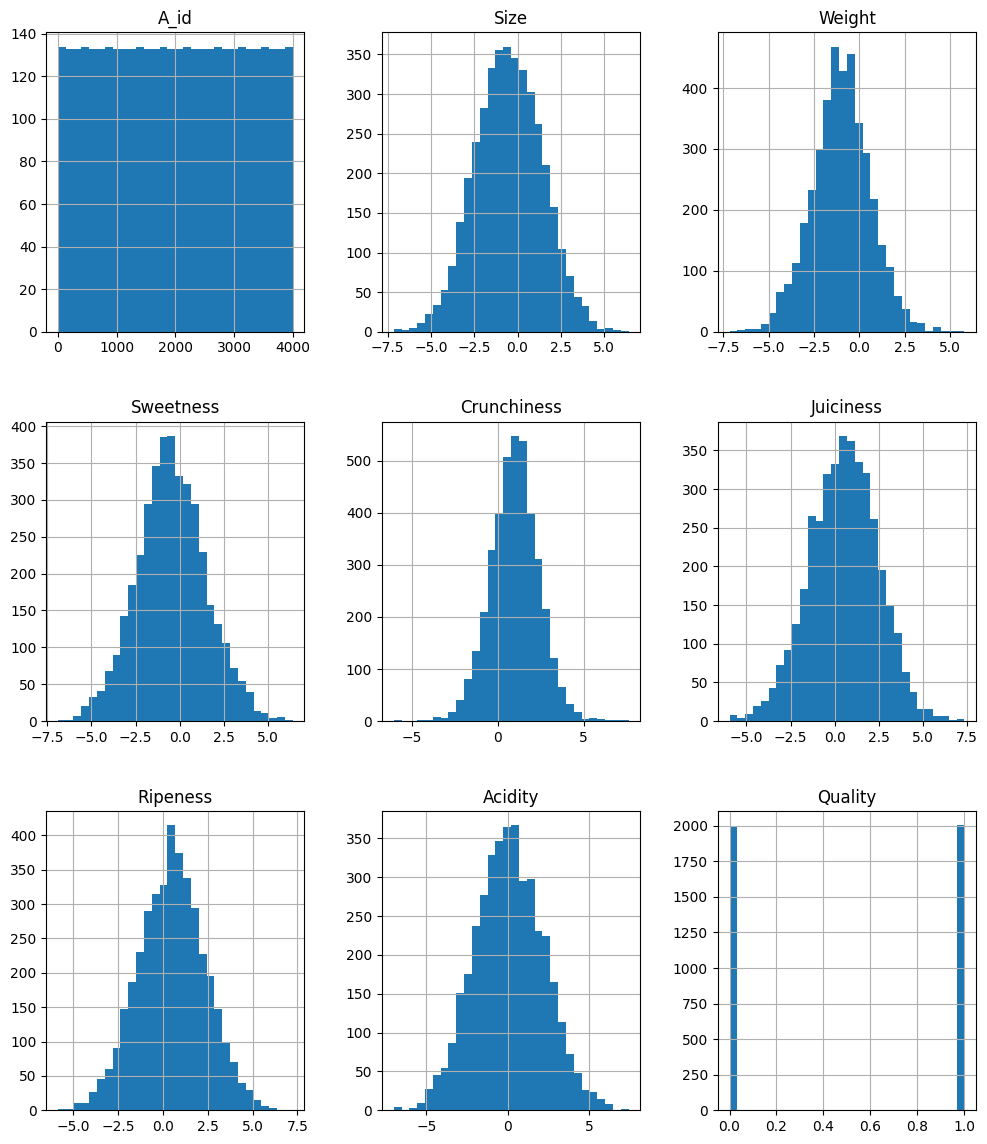

In [40]:
data.hist(figsize=(12, 14), bins=30) # histograma de los datos para ver la distribucion de los datos en cada columna de la data 
plt.show() # muestra el histograma de los datos 

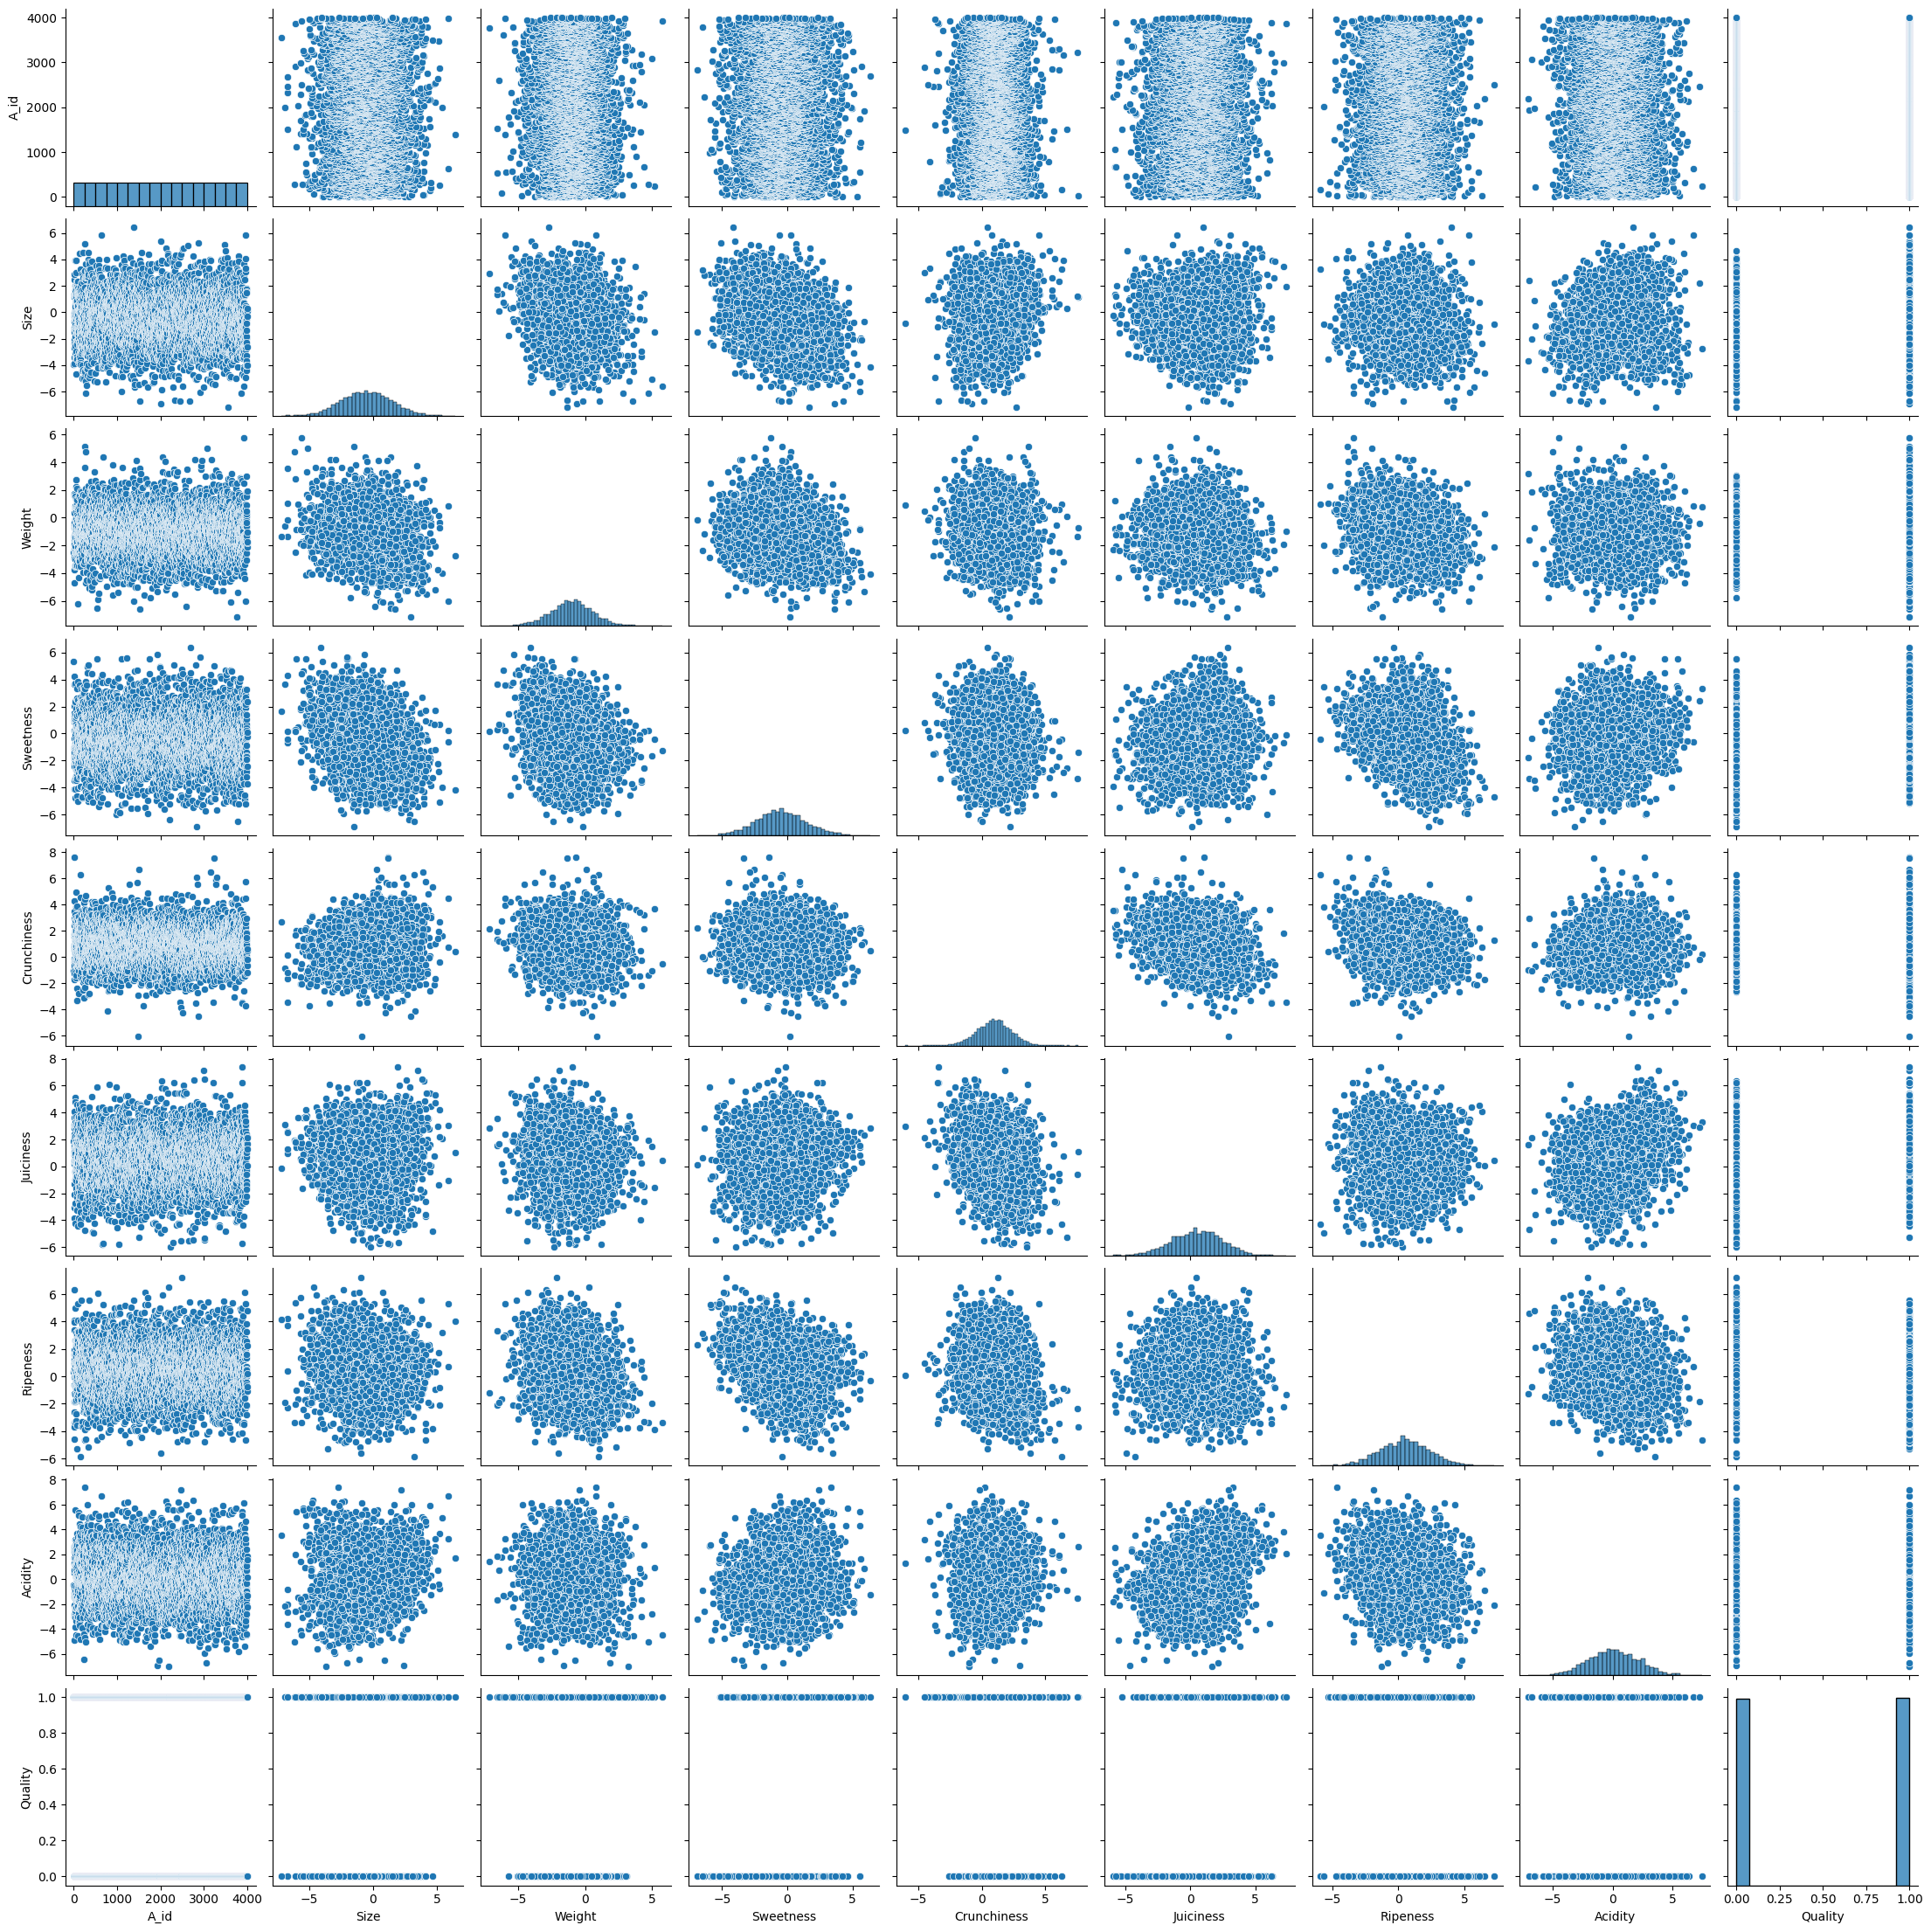

In [41]:
sns.pairplot(data) # grafico de pares para ver la relacion entre las variables de la data

Manejo de valores atipicos

In [42]:
0# Definir función para detectar valores atípicos con IQR

def detectar_outliers_iqr(df): # df es un DataFrame de pandas que contiene solo variables numéricas

    Q1 = df.quantile(0.25) # calcula el primer cuartil
    Q3 = df.quantile(0.75) # calcula el tercer cuartil
    IQR = Q3 - Q1 # calcula el rango intercuartil
    outliers = (df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR)) # calcula los valores atípicos por variable usando el rango intercuartil (IQR)
    return outliers # retorna los valores atípicos detectados por variable en un DataFrame


# Aplicar la función al dataset
outliers = detectar_outliers_iqr(data.select_dtypes(include=[np.number])) # detecta valores atípicos en las variables numéricas del dataset data 
print(outliers.sum())  # Cantidad de valores atípicos por variable en el dataset data 

A_id            0
Size           22
Weight         54
Sweetness      32
Crunchiness    47
Juiciness      32
Ripeness       24
Acidity        20
Quality         0
dtype: int64


Como se logra observar hay un total de 231 datos que actualmente son "outliers" de los cuales se dividirian en:   
1. Size:22

2. Weight: 54

3. Sweetness: 32

4. Crunchiness: 47

5. Juiciness: 32

6. Ripeness: 24

7. Acidity: 20

8. Total: 231


Para poder manejar esta situacion se utilizara la normalizacion y estandarizacion, con el fin de que los datos "outliers" no afectan el aprendizaje del modelo

Pero antes que nada, se hara un analisis de correlacion de los datos, matriz de correlacion de Pearson, eliminacion de variables sin importancia y la distribucion de los valores del dataset entre 1 y 0.

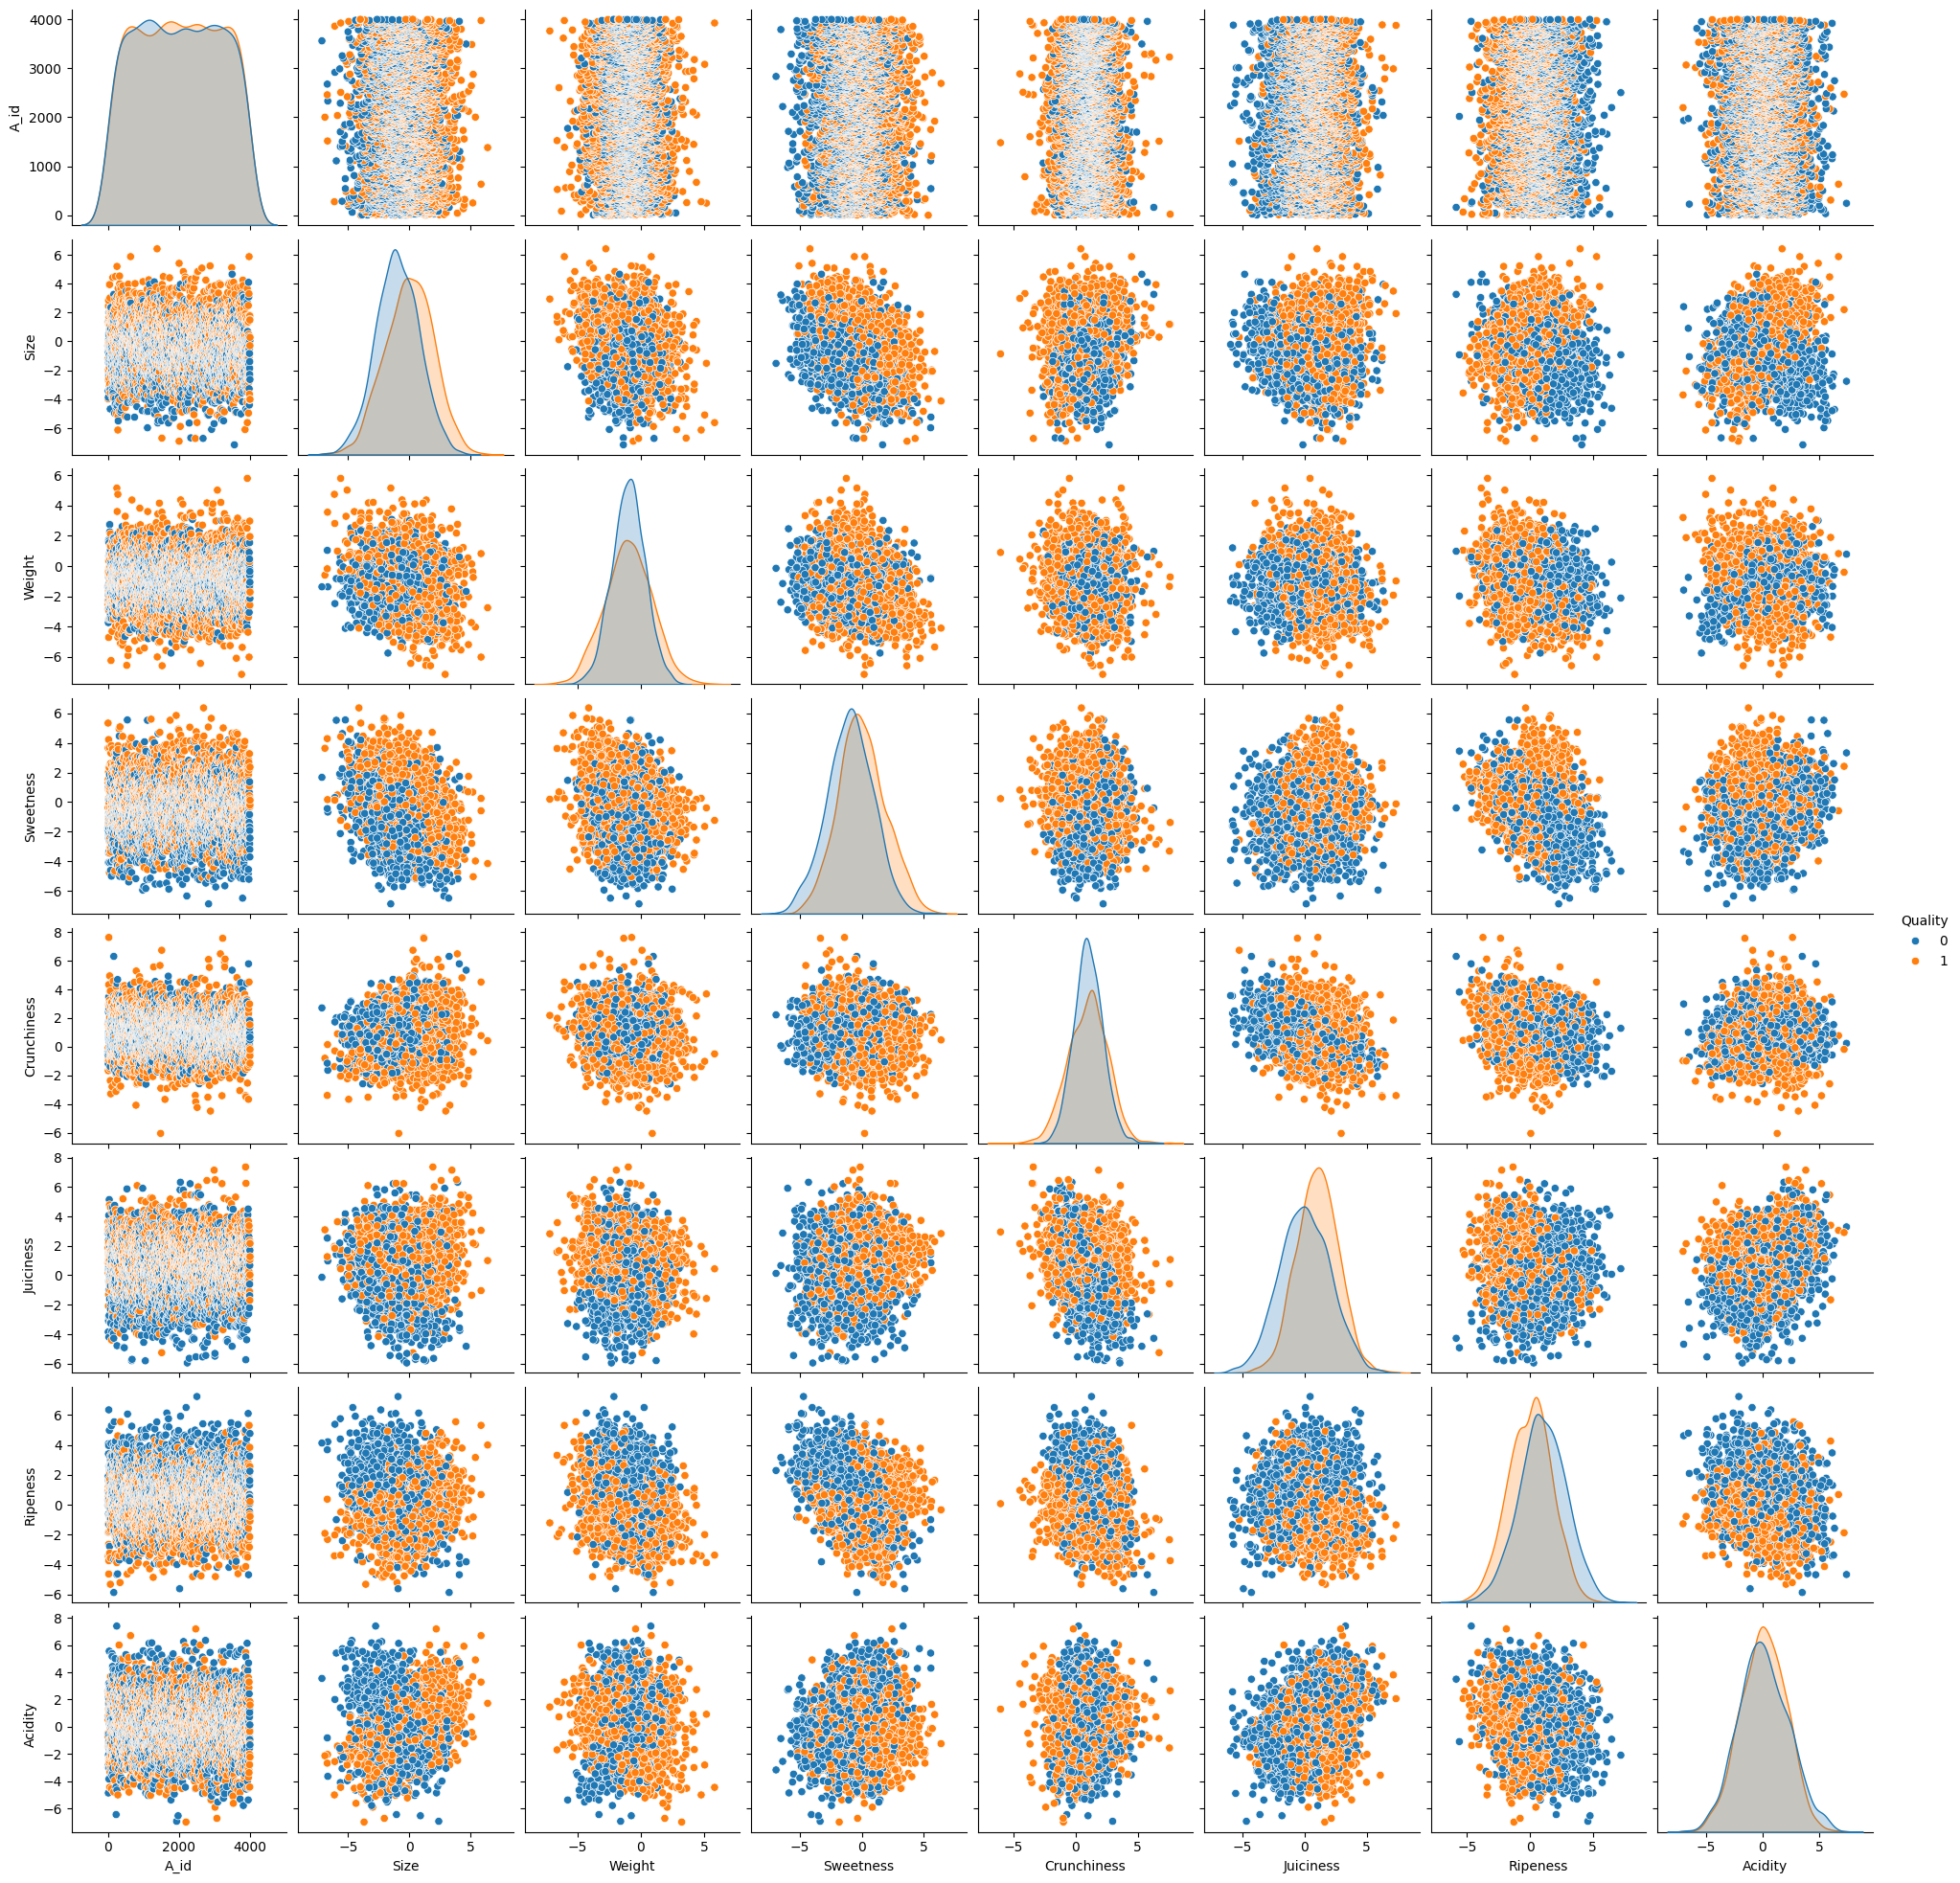

In [44]:
sns.pairplot(data, diag_kind='kde', hue='Quality') # grafico de pares para ver la relacion entre las variables de la data, usando el tipo de calidad como variable categórica


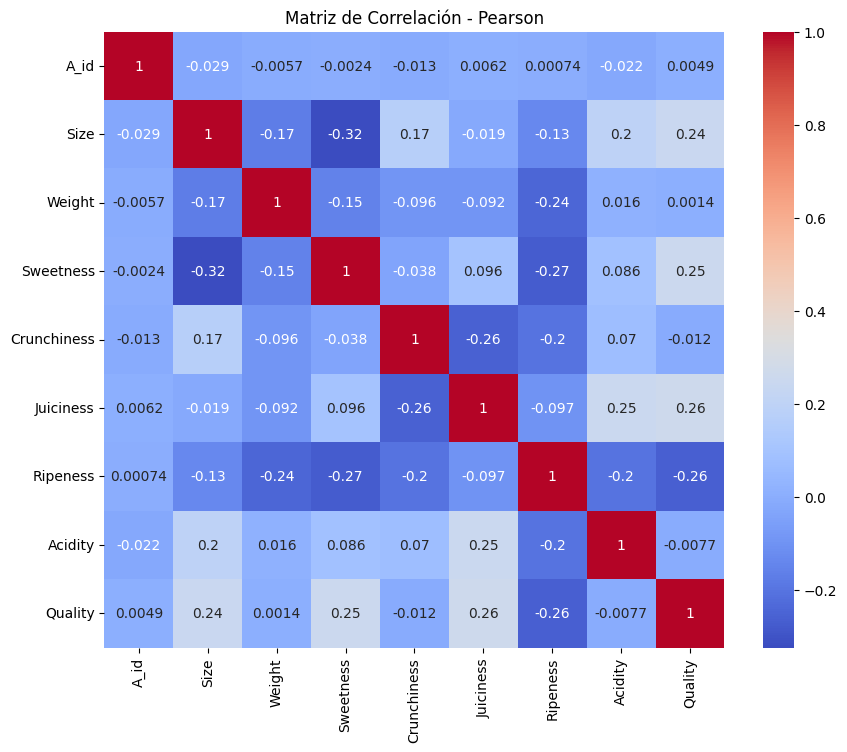

In [45]:
correlation_matrix = data.corr(method="pearson")  # o method="spearman"
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Matriz de Correlación - Pearson')
plt.show()

Tras identificar variables altamente correlacionadas ( con un coeficiente mayor a 0.8 o menor a -0.8) podemos decir lo siguiente:

- Ninguna variables tiene un acorrelacion extrema con otra
- La variable con mayor correlacion a 'Quality' positivamente es juiciness y negativamente es ripeness.
- Acidity, crunchiness, weight y A_id, tienen poca correlacion con Quality. Esto lo que representa es que no afecta en gran medida a la clasificacion.
- Las variables con mayor relevancia son: Ripeness negativamente y positivamente son Size, Sweetness y juiciness.


Con base a los datos anteriormente obtenidos, se decide eliminar primeramente del modelo Acidity, Crunchiness, Weight y A_id.

In [46]:
# Drop BloodPressure and SkinThickness
data.drop(columns=['Acidity', 'Crunchiness','Weight', 'A_id'], inplace=True)


C:\Users\brand\AppData\Local\Temp\ipykernel_1472\3205191342.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.drop(columns=['Acidity', 'Crunchiness','Weight', 'A_id'], inplace=True)


Es necesario saber como estan distribuidos los datos, para poder repartir equitativamente los datos para el training y testing del modelo

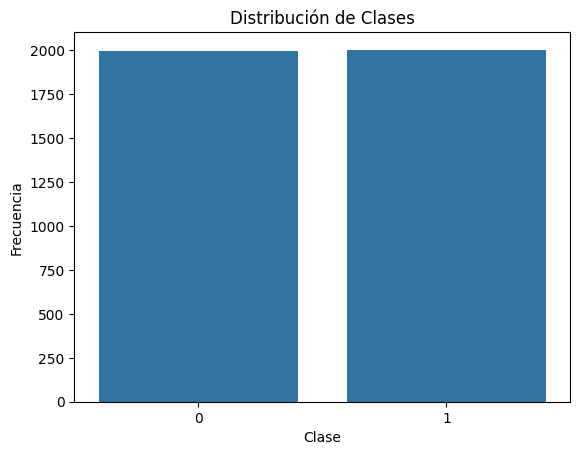

In [ ]:
# visualización estadística da la distribución de las clases

sns.countplot(x='Quality', data=data)
plt.title('Distribución de Clases')
plt.xlabel('Clase')
plt.ylabel('Frecuencia')
plt.show()

Podemos observar que hay levemente mas casos de manzanas de buena calidad, lo que hace que debamos de realizar una buena división del dataset para evadir sesgos.


📌 Mejor combinación encontrada: {'metric': 'euclidean', 'n_neighbors': 19, 'weights': 'distance'}
✅ Mejor precisión obtenida (validación cruzada): 0.82
✅ Accuracy: 0.79
🔁 Recall: 0.84

📊 Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.74      0.78       599
           1       0.76      0.84      0.80       601

    accuracy                           0.79      1200
   macro avg       0.79      0.79      0.79      1200
weighted avg       0.79      0.79      0.79      1200



C:\Users\brand\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128270 (\N{RIGHT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


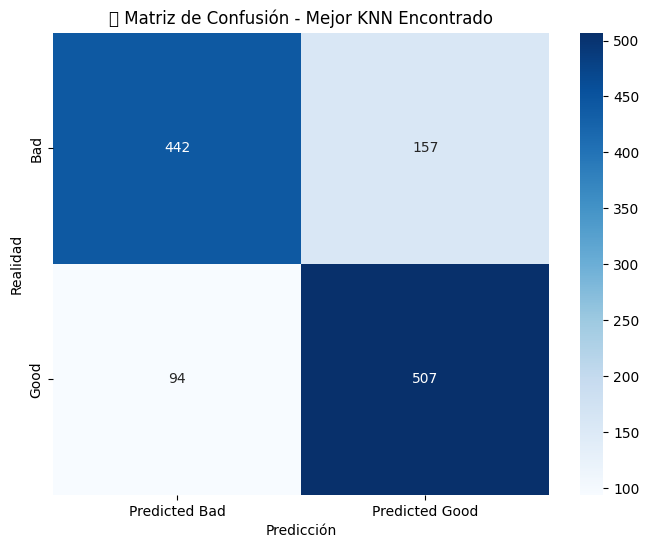

In [59]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, recall_score, classification_report, confusion_matrix

# 1. Definir features y target
X = data[["Size", "Sweetness", "Juiciness", "Ripeness"]]
y = data["Quality"]

# 2. División de datos (70% train, 30% test, estratificado)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# 3. Escalar los datos
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 4. Ajuste de hiperparámetros con GridSearchCV
param_grid = {
    'n_neighbors': list(range(1, 21)),
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

grid_search = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train_scaled, y_train)

print("📌 Mejor combinación encontrada:", grid_search.best_params_)
print(f"✅ Mejor precisión obtenida (validación cruzada): {grid_search.best_score_:.2f}")

# 5. Obtener el mejor modelo encontrado
best_knn = grid_search.best_estimator_

# 6. Función de evaluación para cualquier modelo
def evaluate_model_basic(X_test, y_test, model, cmap='Blues'):
    y_pred = model.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    print(f"✅ Accuracy: {accuracy:.2f}")
    print(f"🔁 Recall: {recall:.2f}")
    print("\n📊 Classification Report:")
    print(classification_report(y_test, y_pred))

    cm = confusion_matrix(y_test, y_pred)
    cm_df = pd.DataFrame(cm, index=['Bad', 'Good'], columns=['Predicted Bad', 'Predicted Good'])

    plt.figure(figsize=(8, 6))
    sns.heatmap(cm_df, annot=True, fmt='d', cmap=cmap)
    plt.title('🔎 Matriz de Confusión - Mejor KNN Encontrado')
    plt.xlabel('Predicción')
    plt.ylabel('Realidad')
    plt.show()

# 7. Evaluar el modelo optimizado
evaluate_model_basic(X_test_scaled, y_test, best_knn)


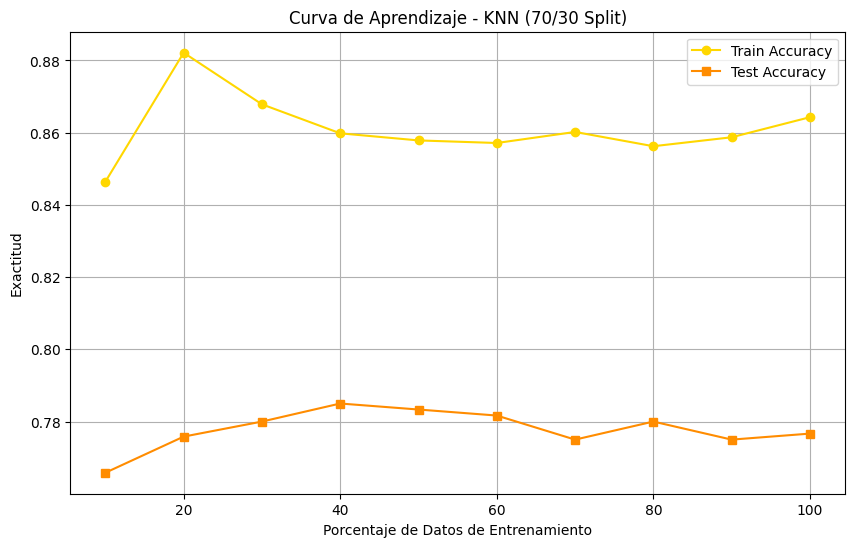

In [51]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Generar curva de aprendizaje con 70/30 split
train_sizes = np.linspace(0.1, 1.0, 10)
train_scores = []
test_scores = []

for frac in train_sizes:
    idx = int(len(X_train_scaled) * frac)
    knn = KNeighborsClassifier(n_neighbors=5)
    knn.fit(X_train_scaled[:idx], y_train[:idx])
    
    # Predicciones
    y_train_pred = knn.predict(X_train_scaled[:idx])
    y_test_pred = knn.predict(X_test_scaled)
    
    # Exactitud
    train_scores.append(accuracy_score(y_train[:idx], y_train_pred))
    test_scores.append(accuracy_score(y_test, y_test_pred))

# Graficar curva
plt.figure(figsize=(10, 6))
plt.plot(train_sizes * 100, train_scores, label='Train Accuracy', marker='o', color='gold')
plt.plot(train_sizes * 100, test_scores, label='Test Accuracy', marker='s', color='darkorange')
plt.xlabel('Porcentaje de Datos de Entrenamiento')
plt.ylabel('Exactitud')
plt.title('Curva de Aprendizaje - KNN (70/30 Split)')
plt.legend()
plt.grid(True)
plt.show()


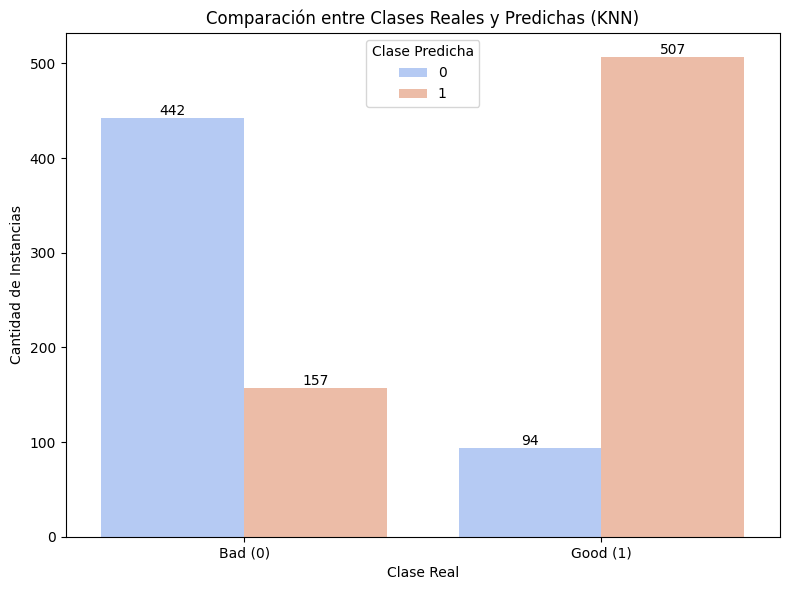

In [60]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Crear DataFrame con Real vs Predicho
df_comparacion = pd.DataFrame({
    "Real": y_test.values,
    "Predicho": y_test_pred
})

# Agrupar y contar combinaciones
conteo = df_comparacion.groupby(["Real", "Predicho"]).size().reset_index(name='Cantidad')

# Crear gráfico de barras comparativas
plt.figure(figsize=(8, 6))
barplot = sns.barplot(x='Real', y='Cantidad', hue='Predicho', data=conteo, palette='coolwarm')

# Añadir etiquetas con cantidades exactas
for container in barplot.containers:
    barplot.bar_label(container, fmt='%d', label_type='edge', fontsize=10)

plt.title('Comparación entre Clases Reales y Predichas (KNN)')
plt.xlabel('Clase Real')
plt.ylabel('Cantidad de Instancias')
plt.xticks([0, 1], ['Bad (0)', 'Good (1)'])
plt.legend(title='Clase Predicha')
plt.tight_layout()
plt.show()


In [61]:
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix

# Calcular métricas de evaluación
precision = precision_score(y_test, y_test_pred)
recall = recall_score(y_test, y_test_pred)
f1 = f1_score(y_test, y_test_pred)
cm = confusion_matrix(y_test, y_test_pred)

# Mostrar resultados
print("📊 Evaluación del Modelo KNN:")
print("--------------------------------")
print(f"✅ Precisión (Precision):     {precision:.2f}")
print(f"🔁 Sensibilidad (Recall):     {recall:.2f}")
print(f"🎯 F1-Score:                  {f1:.2f}")
print("--------------------------------")
print("🧮 Matriz de Confusión:")
print(f"[[TN={cm[0][0]}  FP={cm[0][1]}]")
print(f" [FN={cm[1][0]}  TP={cm[1][1]}]]")


📊 Evaluación del Modelo KNN:
--------------------------------
✅ Precisión (Precision):     0.76
🔁 Sensibilidad (Recall):     0.84
🎯 F1-Score:                  0.80
--------------------------------
🧮 Matriz de Confusión:
[[TN=442  FP=157]
 [FN=94  TP=507]]
